In [2]:
library(MASS)
library(ISLR)
library(dplyr)
library(lmtest)
library(ggplot2)
library(reshape2)
library(IRdisplay)

In [3]:
#remove.packages("rlang")
#install.packages("rlang")
#install.packages("IRdisplay")


In [4]:
data <- read.csv("housing_new.csv", sep=";")

In [5]:
head(data)

,PCCR,PRLZ,INDUS,NOX,AVR,AGE,DIS,RAD,TAX,TAX2,SUB,MEDV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,1,296,77,0.06,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,2,242,54,0.41,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,2,242,53,0.08,34.7
4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,3,222,60,0.45,33.4
5,0.06905,0,2.18,0.458,7.147,54.2,6.0622,3,222,63,0.27,36.2
6,0.02985,0,2.18,0.458,6.430,58.7,6.0622,3,222,52,0.37,28.7


In [6]:
# Check for missing values
any_missing <- anyNA(data)

In [7]:
any_missing

[1] FALSE

In [8]:
# Remove missing values if any
if (any_missing) {
  data <- na.omit(data)
}

In [9]:
# Structure of the data frame:
str(data)

'data.frame':	506 obs. of  12 variables:
 $ PCCR : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ PRLZ : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS: num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ NOX  : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ AVR  : num  6.58 6.42 7.18 7 7.15 ...
 $ AGE  : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS  : num  4.09 4.97 4.97 6.06 6.06 ...
 $ RAD  : int  1 2 2 3 3 3 5 5 5 5 ...
 $ TAX  : int  296 242 242 222 222 222 311 311 311 311 ...
 $ TAX2 : int  77 54 53 60 63 52 67 77 76 73 ...
 $ SUB  : num  0.06 0.41 0.08 0.45 0.27 0.37 0.48 0.02 0.29 0.35 ...
 $ MEDV : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [10]:
ncol(data)

[1] 12

In [11]:
nrow(data)

[1] 506

In [12]:
# All column names

colnames(data)

[1] "PCCR"  "PRLZ"  "INDUS" "NOX"   "AVR"   "AGE"   "DIS"   "RAD"   "TAX"  
[10] "TAX2"  "SUB"   "MEDV"

In [13]:
summary(data)

      PCCR               PRLZ            INDUS            NOX        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.3850  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :0.8710  
      AVR             AGE              DIS              RAD        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.127   Max.   :24.000  
      TAX             TAX2        

In [14]:
# Assuming 'df' is your data frame
column_names <- names(data)[1:(length(names(data)) - 1)]

In [15]:
column_names

[1] "PCCR"  "PRLZ"  "INDUS" "NOX"   "AVR"   "AGE"   "DIS"   "RAD"   "TAX"  
[10] "TAX2"  "SUB"

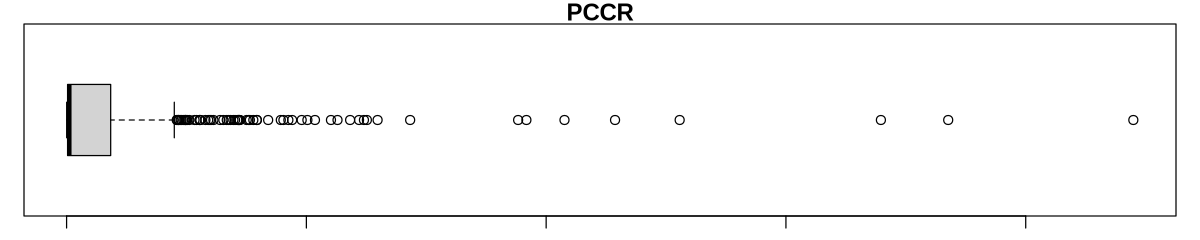

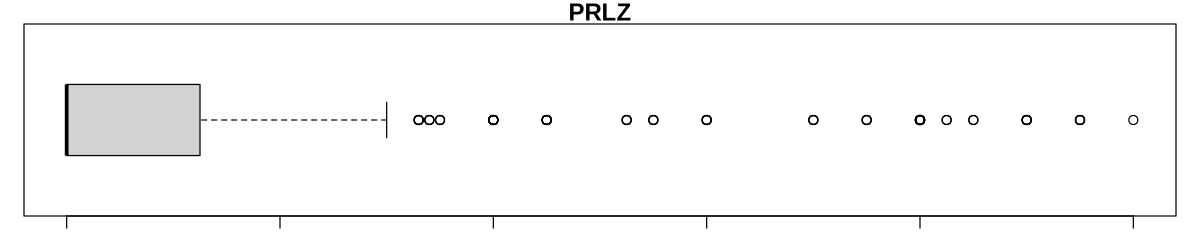

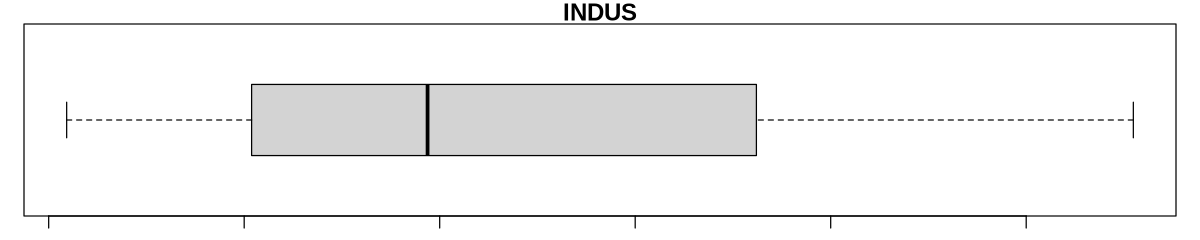

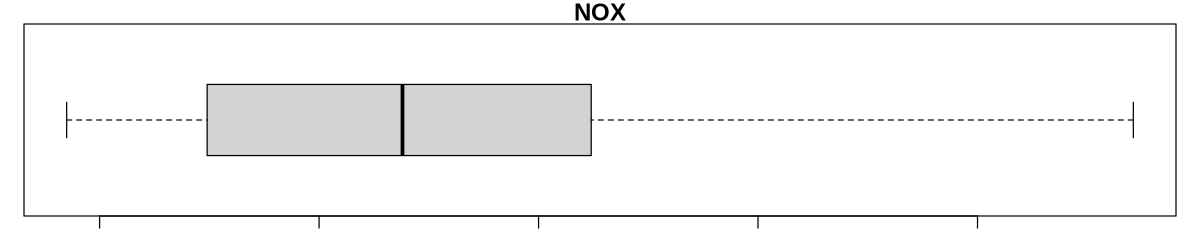

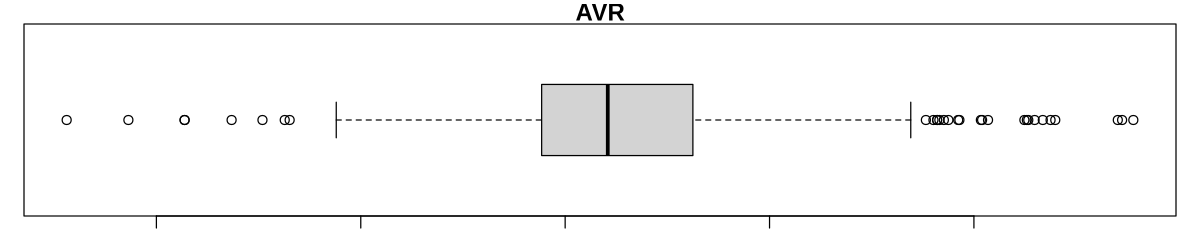

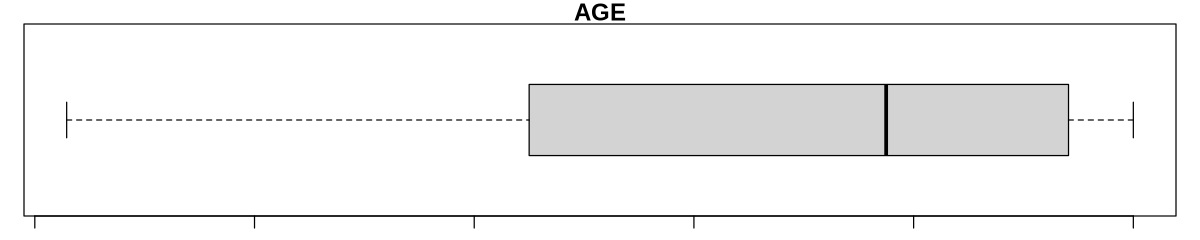

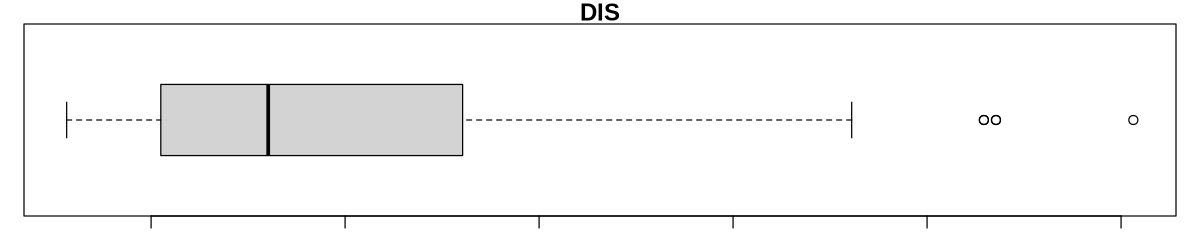

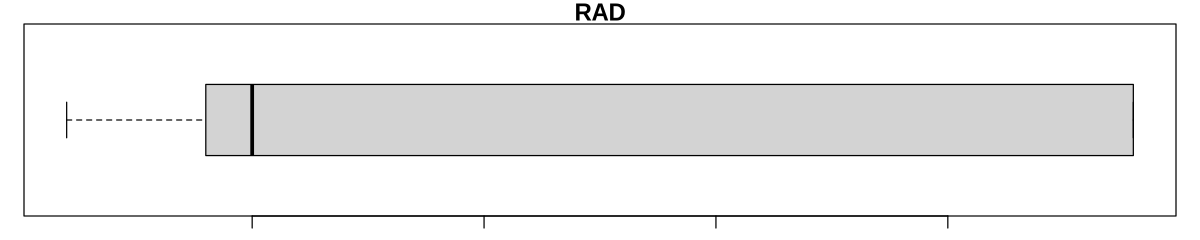

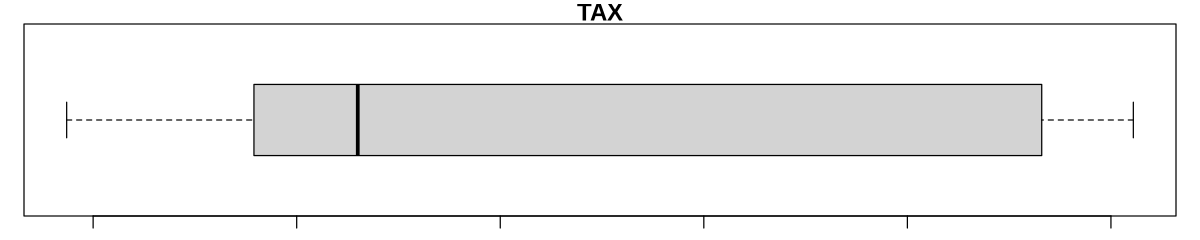

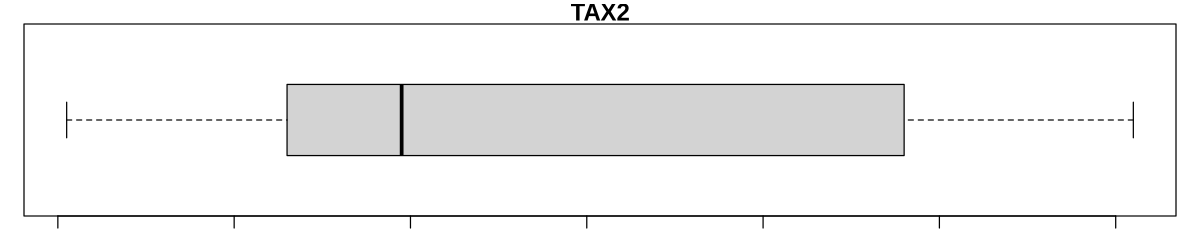

In [16]:
# Set the figure size (adjust width and height as needed)
options(repr.plot.width = 10, repr.plot.height = 2)

# Create a matrix of boxplots
par(mfcol = c(6, 6))  # Adjust the subplot layout as needed

# Assuming 'df' is your data frame
for (i in 1:(length(column_names) - 1)) {
  # Create a new plot device for each boxplot
  par(mar=c(1,1,1,1))
  par(mfcol = c(1, 1))
  plot.new()

  # Create the boxplot
  boxplot(data[, i], horizontal = TRUE, main = column_names[i], xlab = "Value")
}

# Reset graphical parameters
par(mar=c(1,1,1,1))
par(mfcol = c(1, 1))

# Display the plots
#plot.new()

In [17]:
#calculate correlation coefficients, rounded to 2 decimal places
cor_df <- round(cor(data), 2)

#melt the data frame
melted_cor <- melt(cor_df)

#view head of melted data frame
head(melted_cor)


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,PCCR,PCCR,1.00
2,PRLZ,PCCR,-0.20
3,INDUS,PCCR,0.41
4,NOX,PCCR,0.42
5,AVR,PCCR,-0.22
6,AGE,PCCR,0.35


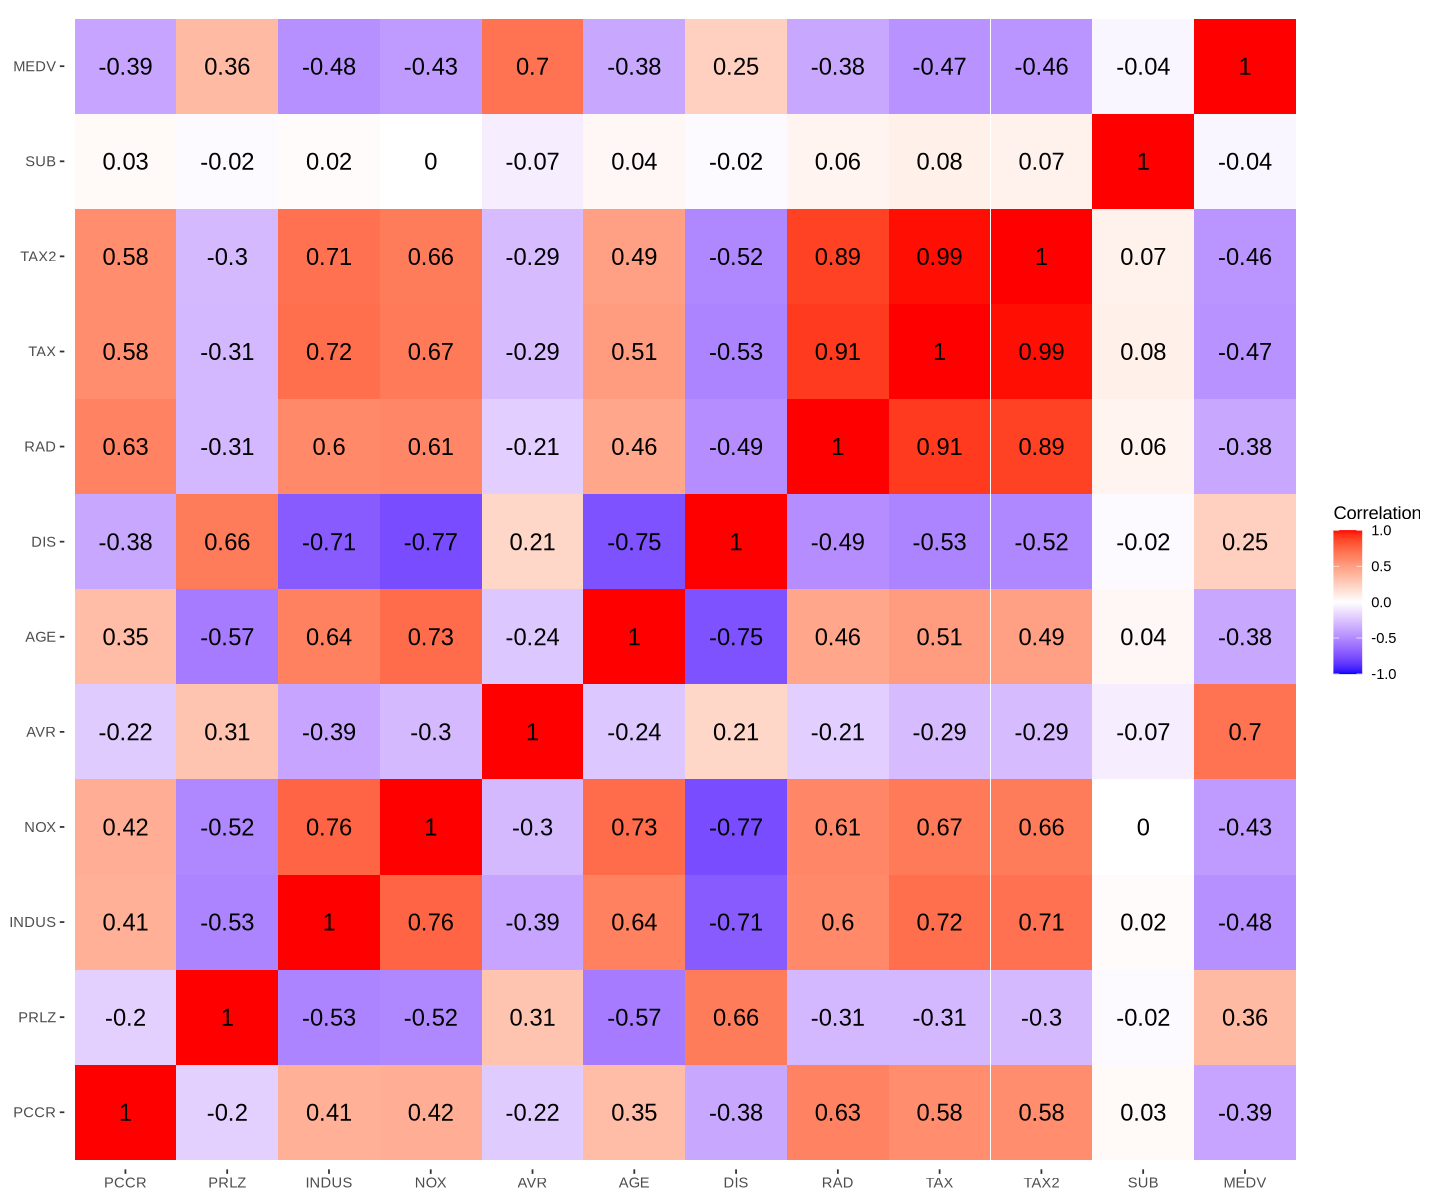

In [18]:
#create correlation heatmap
# Create correlation heatmap
correlation_plot <- ggplot(data = melted_cor, aes(x = Var1, y = Var2, fill = value)) + 
  geom_tile() +
  geom_text(aes(Var2, Var1, label = value), size = 5) + 
  scale_fill_gradient2(low = "blue", high = "red", limits = c(-1, 1), name = "Correlation") +
  theme(axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.background = element_blank())

# Set custom figure dimensions (width and height)
options(repr.plot.width = 12, repr.plot.height = 10)  # Adjust as needed

# Print the plot in the Jupyter Notebook
correlation_plot

In [19]:
# Step 1: Calculate the correlation matrix
cor_matrix <- cor(data)

# Step 2: Find pairs of highly correlated variables
highly_correlated <- which(upper.tri(cor_matrix, diag = FALSE) & abs(cor_matrix) > 0.8)

# Step 3: Create a logical matrix to track variables to keep
variables_to_keep <- rep(TRUE, ncol(data))

for (i in 1:length(highly_correlated)) {
  pair <- highly_correlated[i]
  row_index <- row(cor_matrix)[pair]
  col_index <- col(cor_matrix)[pair]
  
  # Choose the variable with the highest absolute correlation to keep
  if (abs(cor_matrix[row_index, col_index]) > 0.8) {
    if (abs(cor_matrix[row_index, col_index]) == max(abs(cor_matrix[row_index, ]))) {
      variables_to_keep[col_index] <- FALSE
    } else {
      variables_to_keep[row_index] <- FALSE
    }
  }
}

# Step 4: Create a new dataset with the selected variables
data_new <- data[, variables_to_keep]


In [20]:
highly_correlated

[1] 104 116 117

In [21]:
head(data_new)

,PCCR,PRLZ,INDUS,NOX,AVR,AGE,DIS,TAX2,SUB,MEDV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,77,0.06,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,54,0.41,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,53,0.08,34.7
4,0.03237,0,2.18,0.458,6.998,45.8,6.0622,60,0.45,33.4
5,0.06905,0,2.18,0.458,7.147,54.2,6.0622,63,0.27,36.2
6,0.02985,0,2.18,0.458,6.430,58.7,6.0622,52,0.37,28.7


$mfrow
[1] 10 10

$mar
[1] 2 2 2 2

$oma
[1] 1 1 1 1

$las
[1] 3

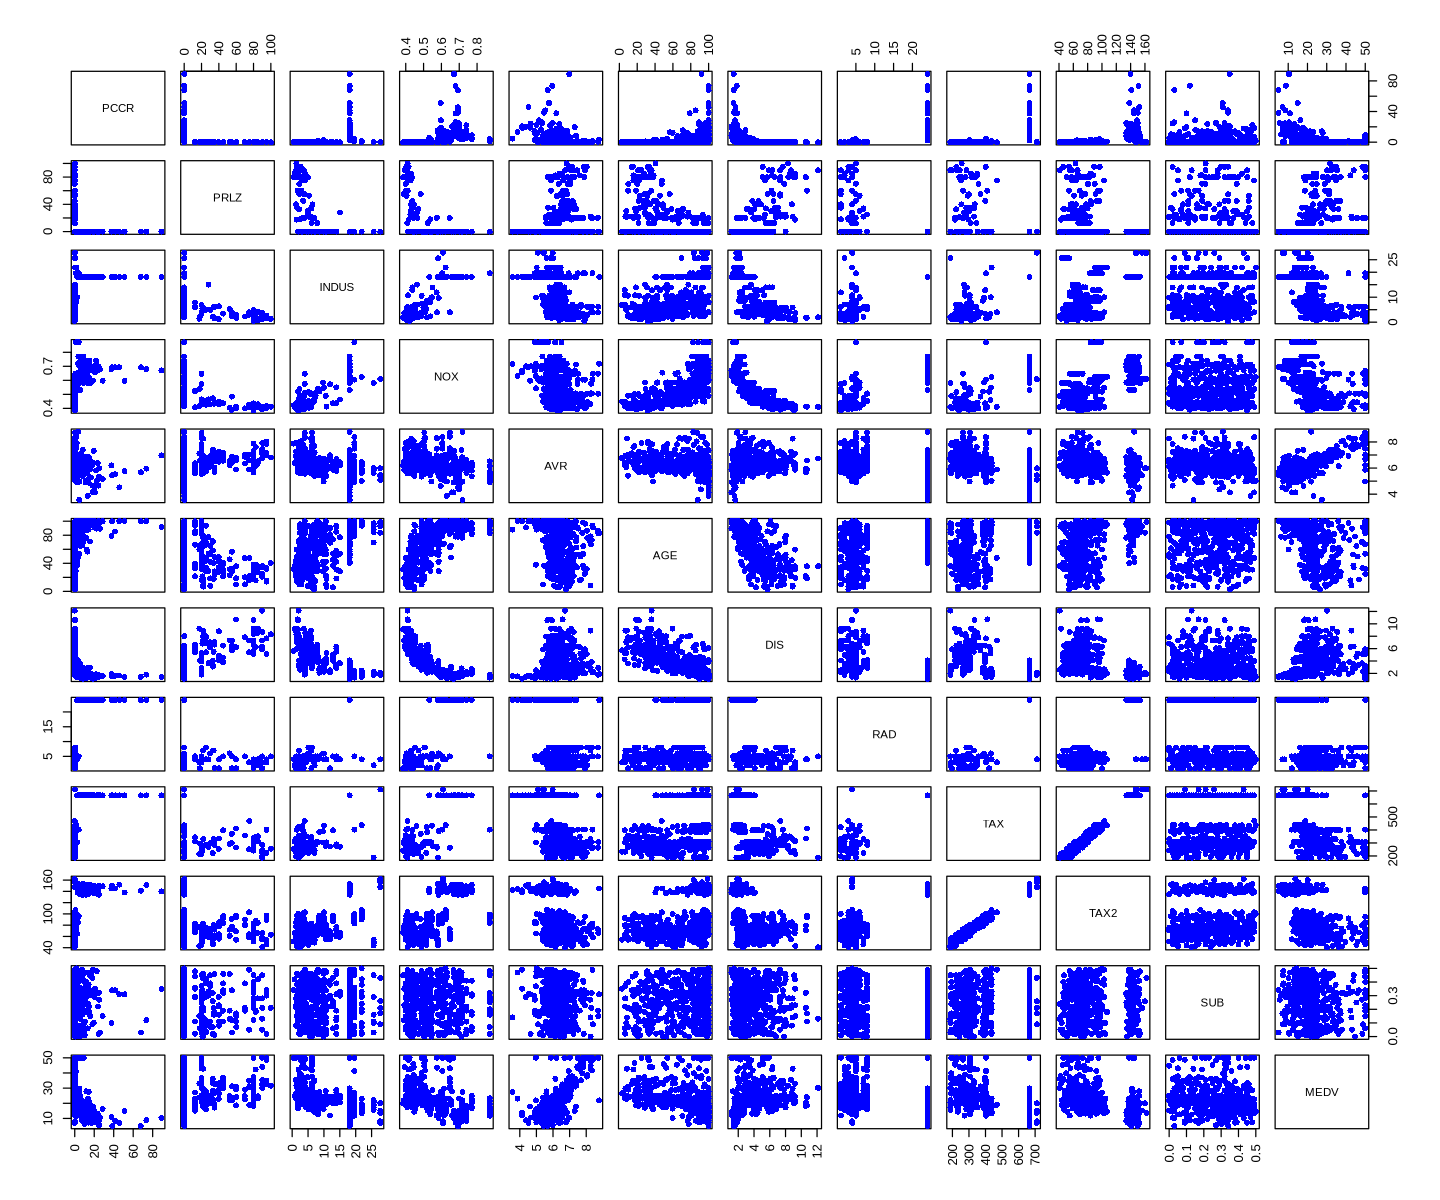

In [22]:

n= 10
# Set custom graphical parameters for the pairs plot
par(mfrow = c(n, n), mar = c(2, 2, 2, 2), oma = c(1, 1, 1, 1), las = 3)

options(repr.plot.width = 12, repr.plot.height = 10)

# Create the pairs plot with custom settings
pairs(data, col = "blue", pch = 16)

# Reset the graphical parameters to their default values
par("mfrow", "mar", "oma", "las")

# Display the plot in the Jupyter Notebook
#display_png(file = "Rplots.png")

Importance of components:
                          PC1    PC2    PC3     PC4    PC5     PC6    PC7
Standard deviation     2.4893 1.1899 1.1431 0.99538 0.7629 0.66960 0.5713
Proportion of Variance 0.5164 0.1180 0.1089 0.08256 0.0485 0.03736 0.0272
Cumulative Proportion  0.5164 0.6344 0.7433 0.82582 0.8743 0.91168 0.9389
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.51090 0.46460 0.39255 0.30424 0.09945
Proportion of Variance 0.02175 0.01799 0.01284 0.00771 0.00082
Cumulative Proportion  0.96063 0.97862 0.99146 0.99918 1.00000

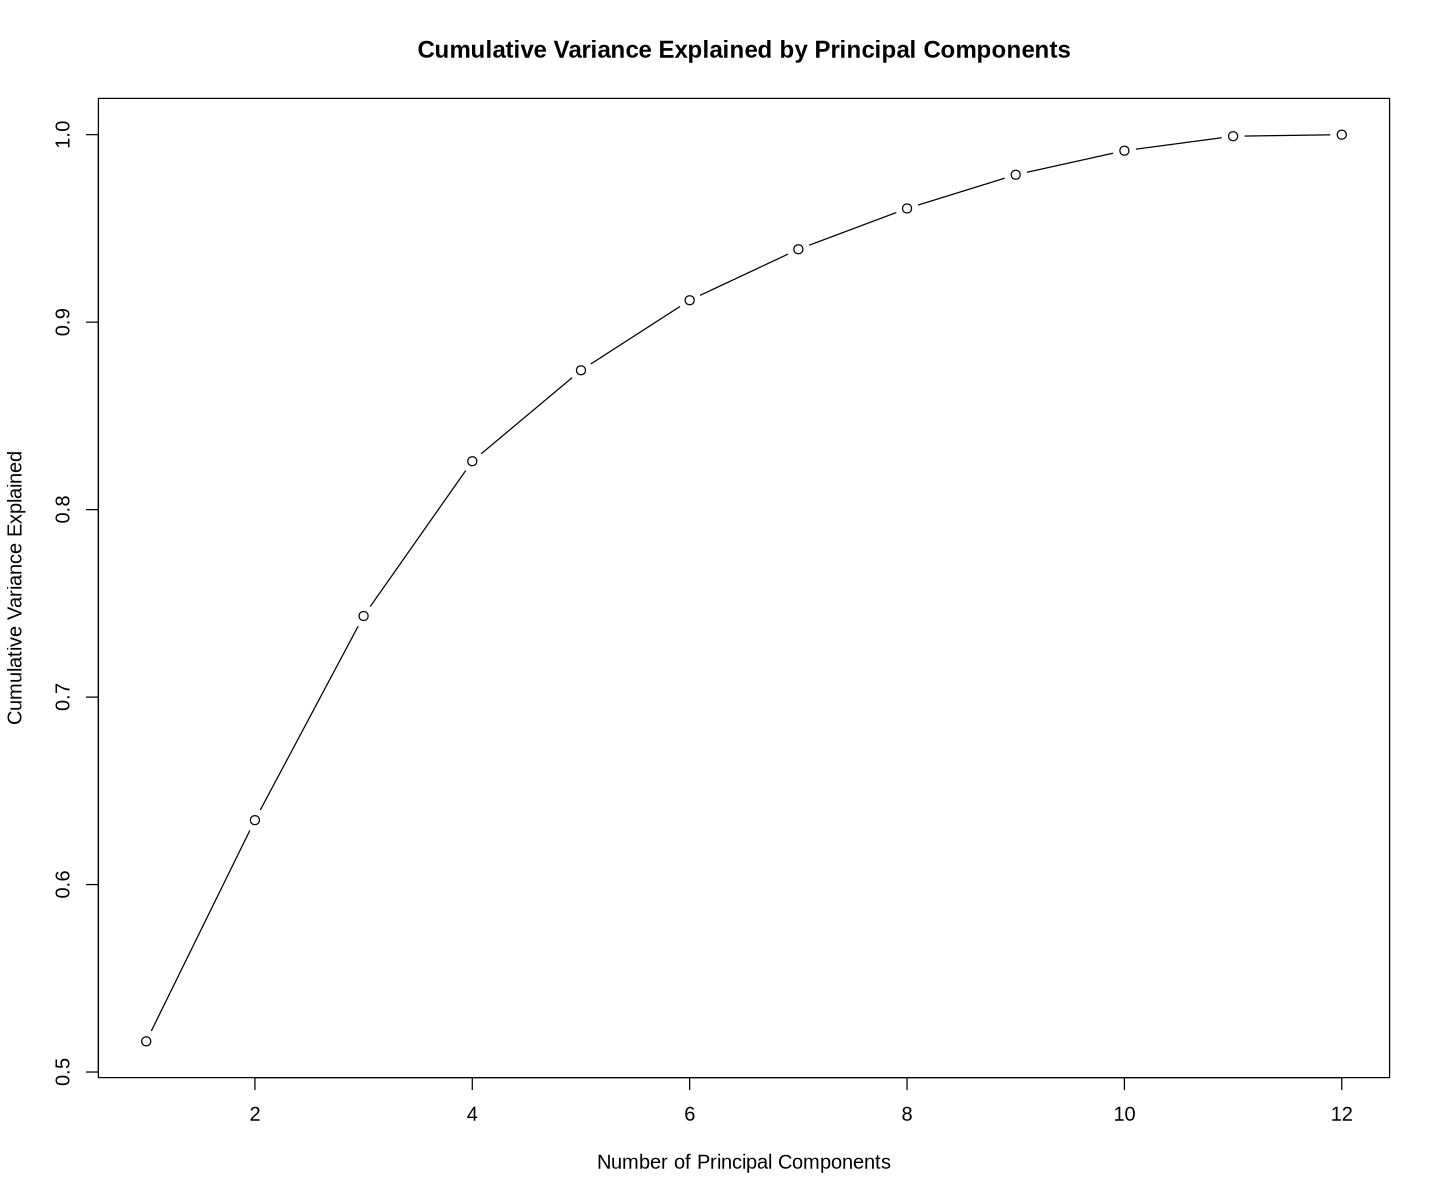

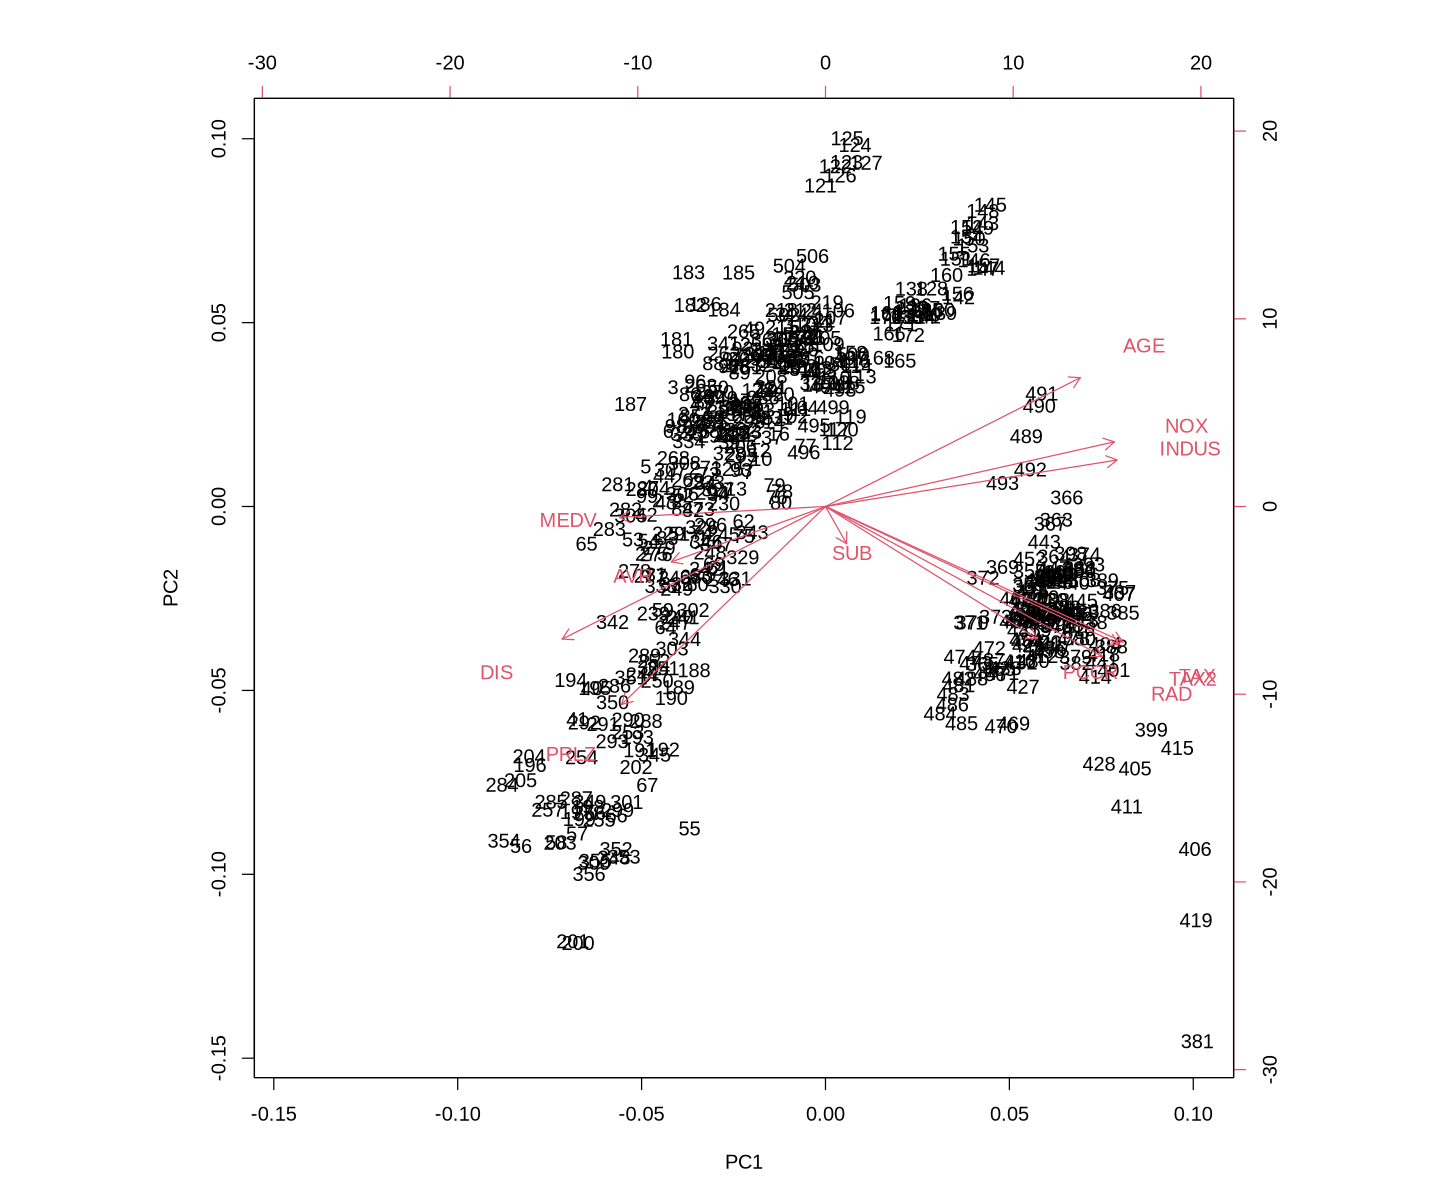

In [23]:
# Standard Scaling
scaled_data <- scale(data)

# PCA
pca_result <- prcomp(scaled_data)

# Summary of PCA results
summary(pca_result)


# Calculate the cumulative variance explained by each principal component
cumulative_variance <- cumsum(pca_result$sdev^2) / sum(pca_result$sdev^2)

# Plot cumulative variance
plot(cumulative_variance, type = "b", xlab = "Number of Principal Components", ylab = "Cumulative Variance Explained", main = "Cumulative Variance Explained by Principal Components")


# Biplot
biplot(pca_result)


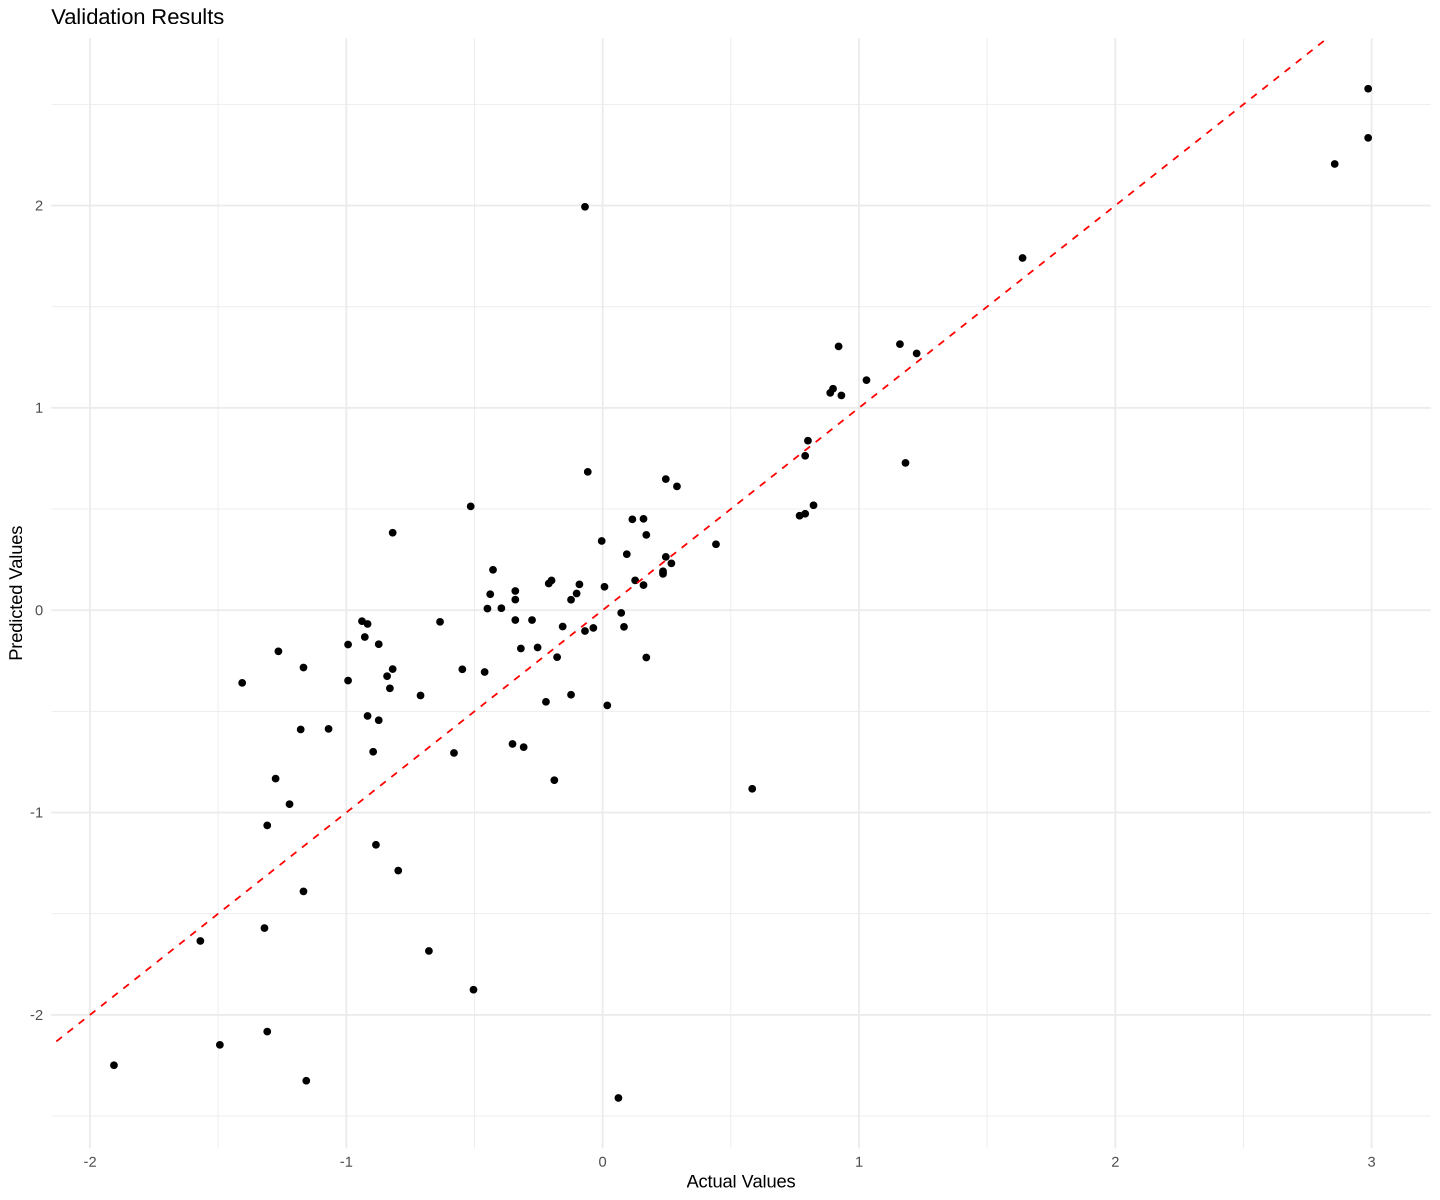

In [24]:
sample_indices <- sample(1:nrow(scaled_data), 0.8 * nrow(scaled_data))
train_data <- scaled_data[sample_indices, ]
test_data <- scaled_data[-sample_indices, ]
train_data_df <- as.data.frame(train_data)
test_data_df <- as.data.frame(test_data)

model <- lm(MEDV ~ ., data = train_data_df)

predictions <- predict(model, newdata = test_data_df)

library(ggplot2)

ggplot(data = data.frame(Actual = test_data_df$MEDV, Predicted = predictions)) +
  geom_point(aes(x = Actual, y = Predicted)) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(x = "Actual Values", y = "Predicted Values", title = "Validation Results") +
  theme_minimal()

In [25]:
summary(model)


Call:
lm(formula = MEDV ~ ., data = train_data_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7442 -0.3037 -0.0745  0.2070  4.2098 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01910    0.03152   0.606 0.544901    
PCCR        -0.21003    0.05020  -4.184 3.53e-05 ***
PRLZ         0.16048    0.04518   3.552 0.000429 ***
INDUS       -0.05297    0.05951  -0.890 0.373961    
NOX         -0.09714    0.06080  -1.598 0.110880    
AVR          0.60181    0.03839  15.674  < 2e-16 ***
AGE         -0.16457    0.05122  -3.213 0.001423 ** 
DIS         -0.35983    0.06289  -5.721 2.10e-08 ***
RAD          0.17562    0.08674   2.025 0.043594 *  
TAX         -0.26971    0.24124  -1.118 0.264239    
TAX2        -0.01281    0.21470  -0.060 0.952445    
SUB          0.01025    0.03178   0.322 0.747306    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6295 on 392 degrees of freedom
Multiple R-squared:  0.6

In [26]:
# Get the summary of the model
summary_model <- summary(model)

# Extract the R-squared value
r_squared <- summary_model$r.squared

# Print the R-squared value
print(paste("R-squared (R²):", round(r_squared, 3)))

[1] "R-squared (R²): 0.63"


In [27]:
mae <- mean(abs(predictions - test_data_df$MEDV))
print(paste("Mean Absolute Error (MAE):", mae))

[1] "Mean Absolute Error (MAE): 0.432556088951703"


In [28]:
mse <- mean((predictions - test_data_df$MEDV)^2)
print(paste("Mean Squared Error (MSE):", mse))

[1] "Mean Squared Error (MSE): 0.355087283408073"


In [29]:
rmse <- sqrt(mse)
print(paste("Root Mean Squared Error (RMSE):", rmse))

[1] "Root Mean Squared Error (RMSE): 0.595892006497883"


### Linearity

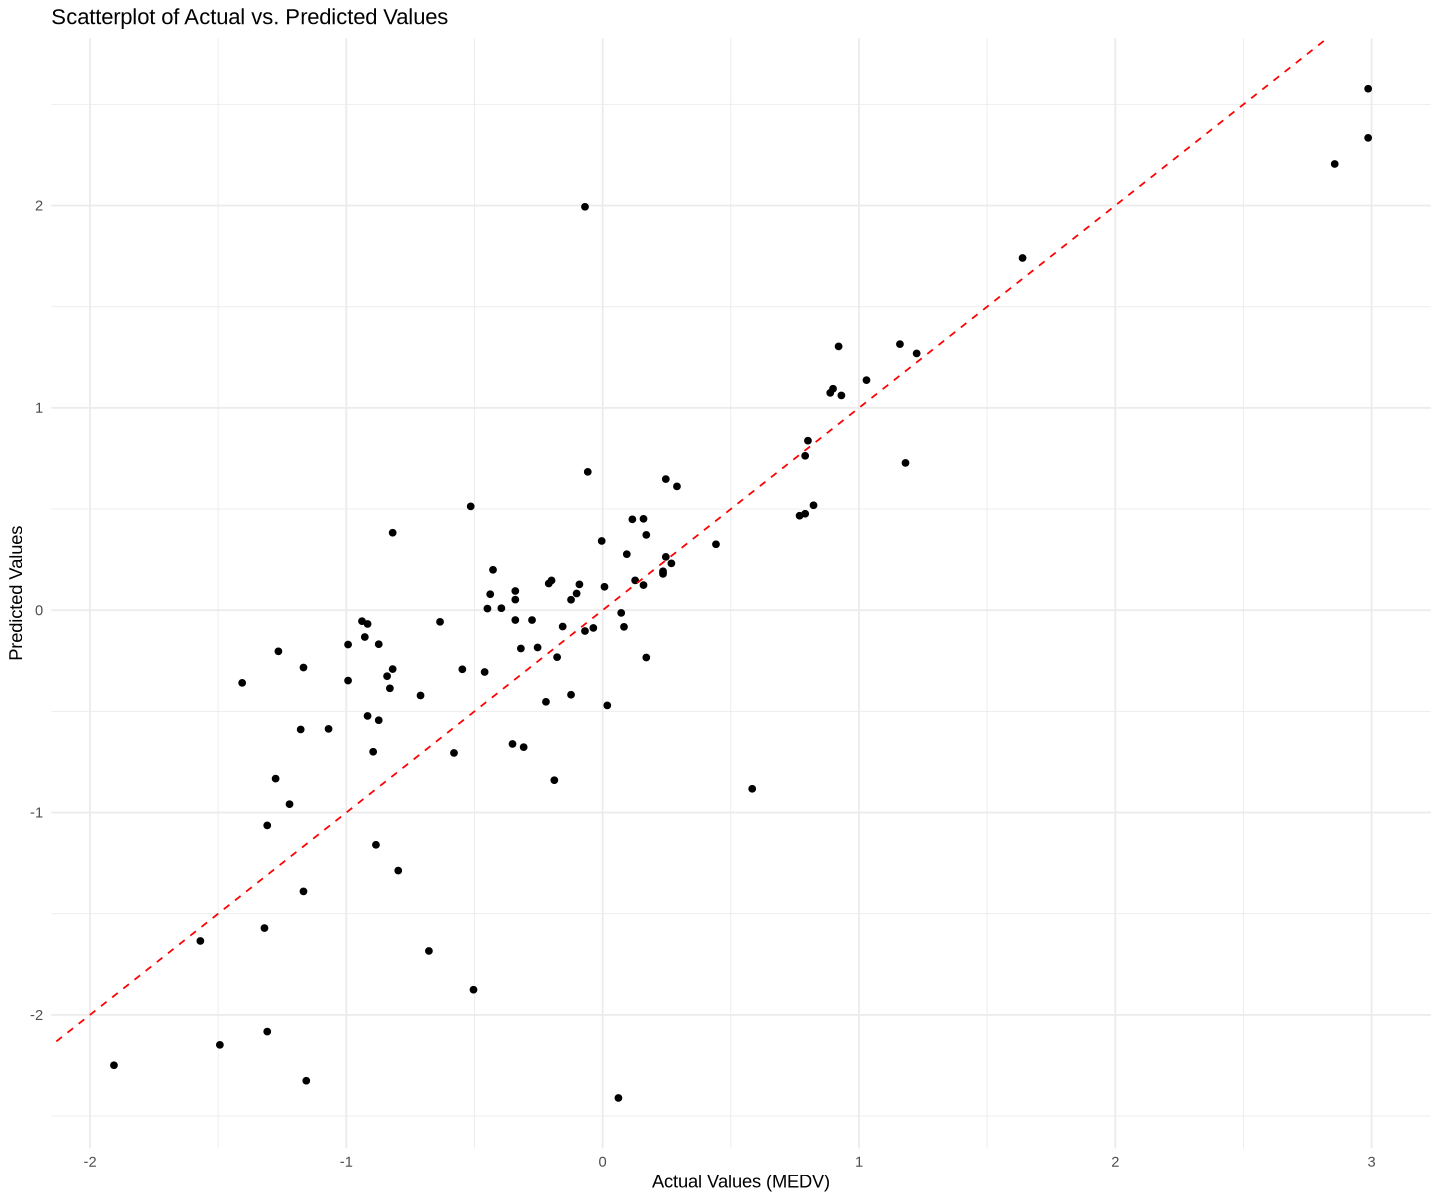

In [30]:
scatterplot <- ggplot(data = data.frame(Actual = test_data_df$MEDV, Predicted = predictions)) +
  geom_point(aes(x = Actual, y = Predicted)) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(x = "Actual Values (MEDV)", y = "Predicted Values", title = "Scatterplot of Actual vs. Predicted Values") +
  theme_minimal()

print(scatterplot)

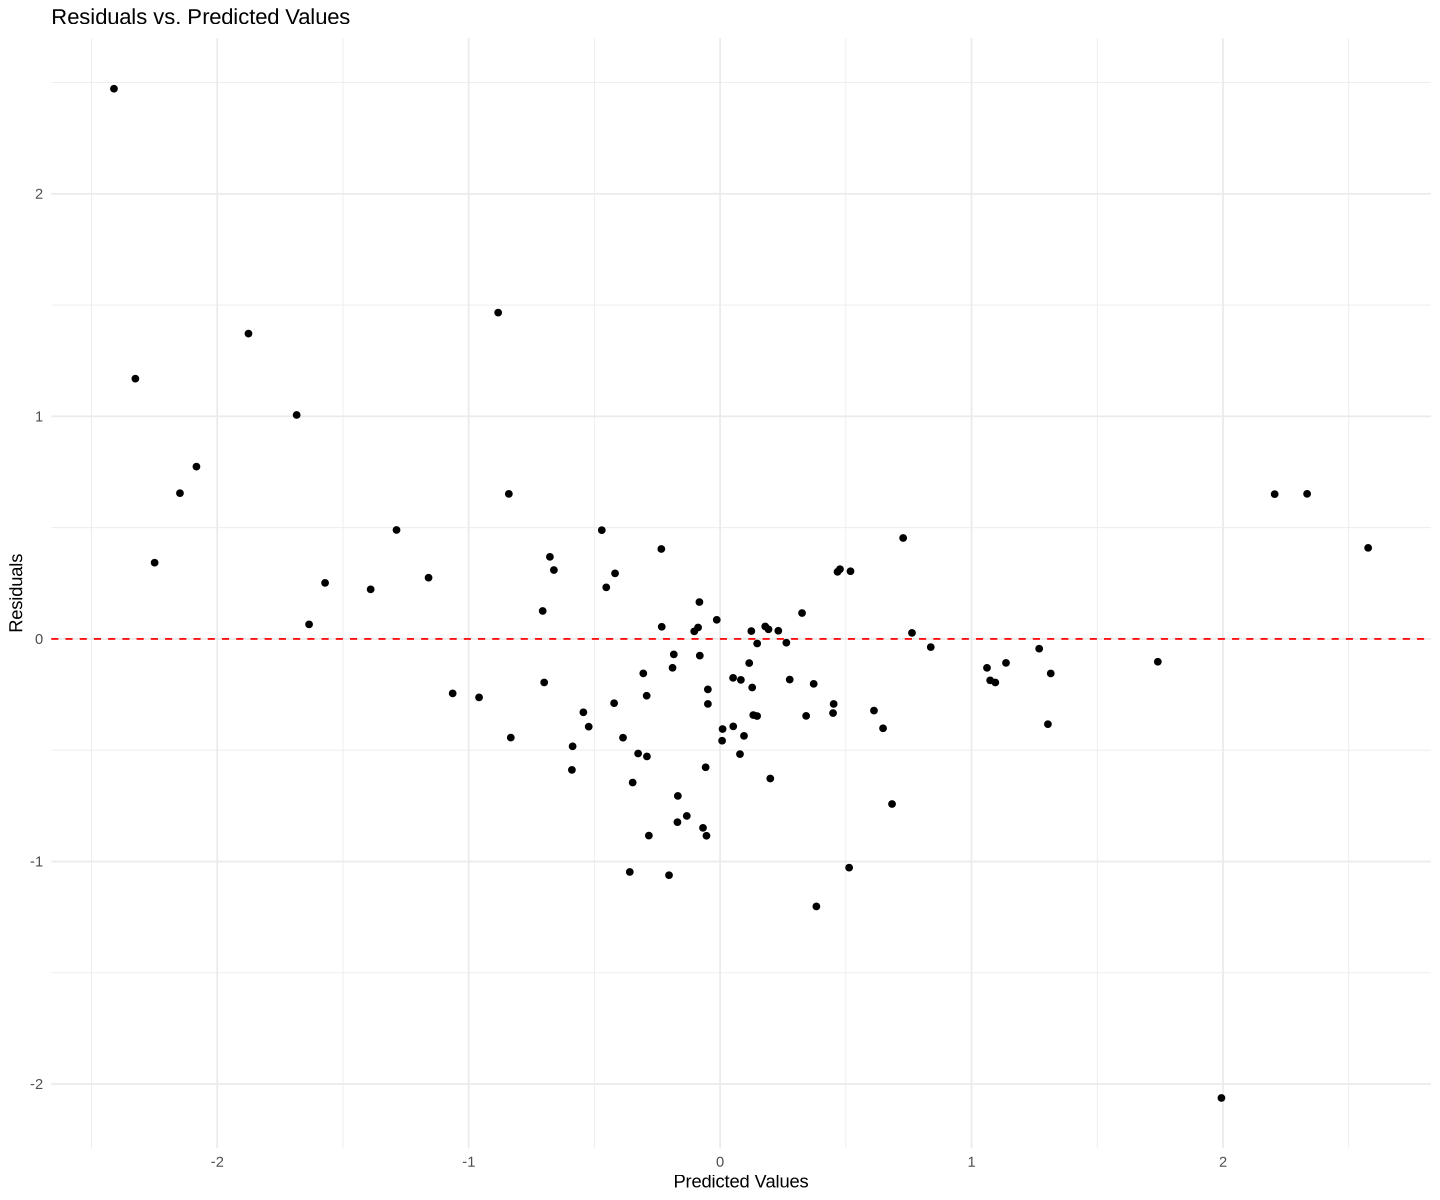

In [31]:
# Calculate residuals
residuals <- test_data_df$MEDV - predictions

# Create a residual vs. predicted plot
ggplot(data = data.frame(Residuals = residuals, Predicted = predictions)) +
  geom_point(aes(x = Predicted, y = Residuals)) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(x = "Predicted Values", y = "Residuals", title = "Residuals vs. Predicted Values") +
  theme_minimal()


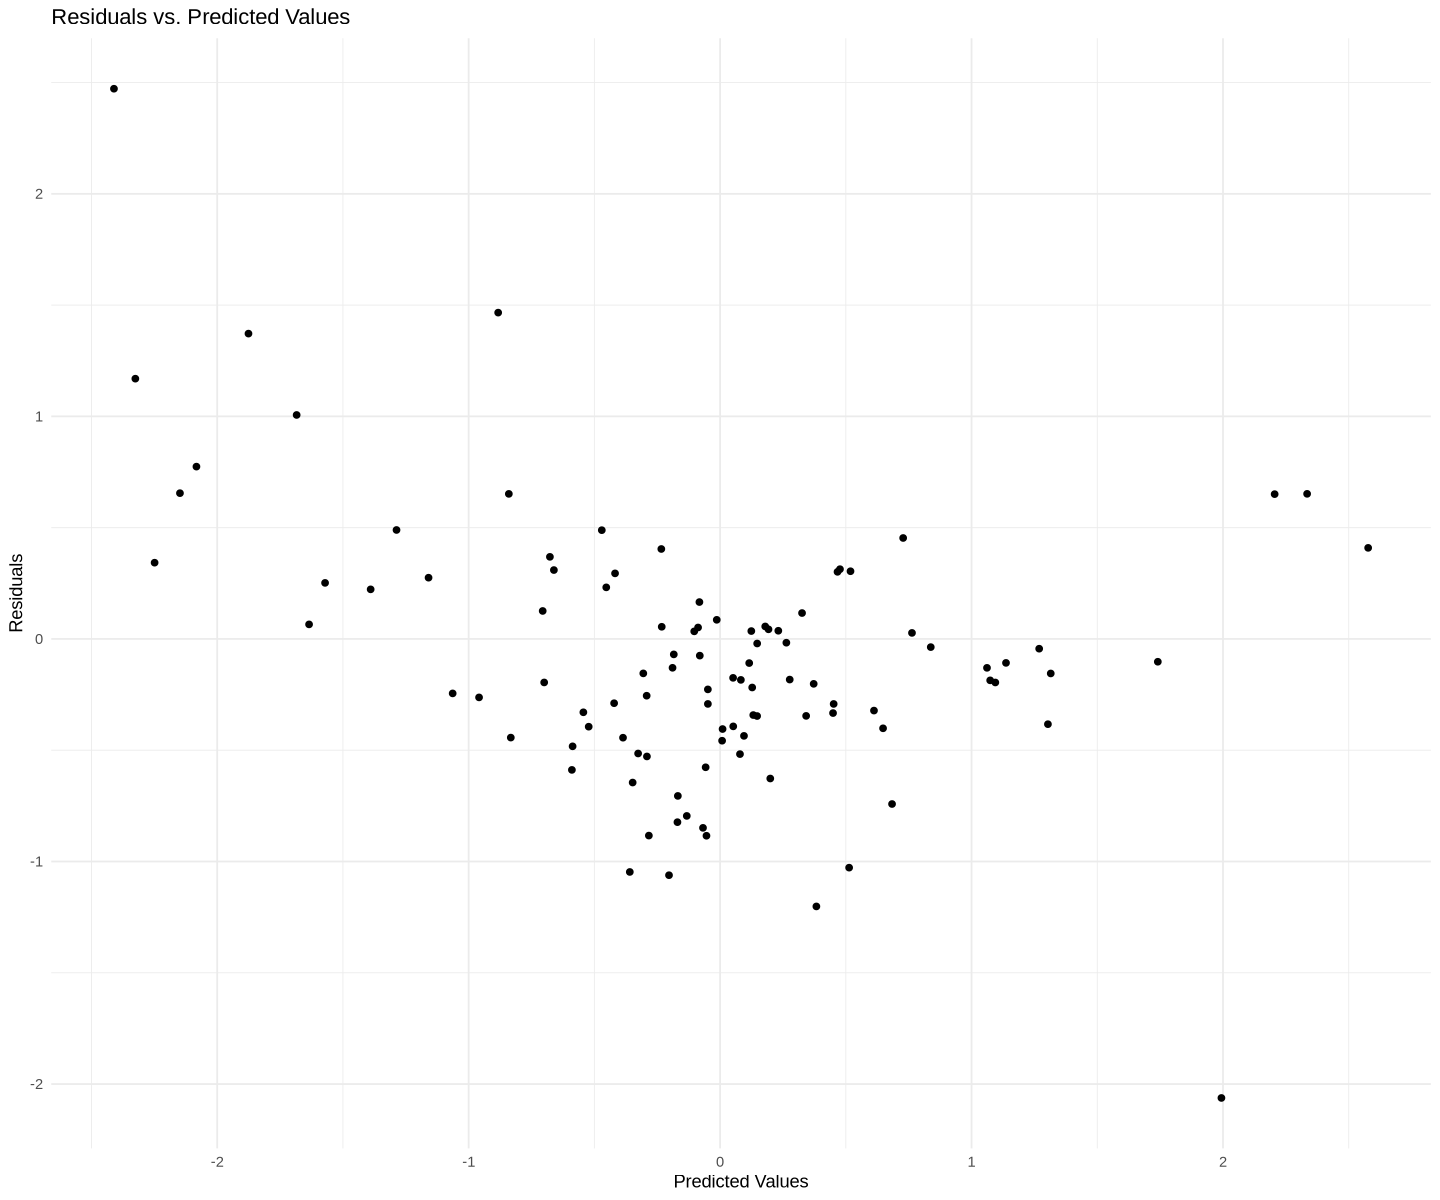

In [32]:
# Create a residual vs. predicted value plot
ggplot(data = data.frame(Residuals = residuals, Predicted = predictions)) +
  geom_point(aes(x = Predicted, y = Residuals)) +
  labs(x = "Predicted Values", y = "Residuals", title = "Residuals vs. Predicted Values") +
  theme_minimal()

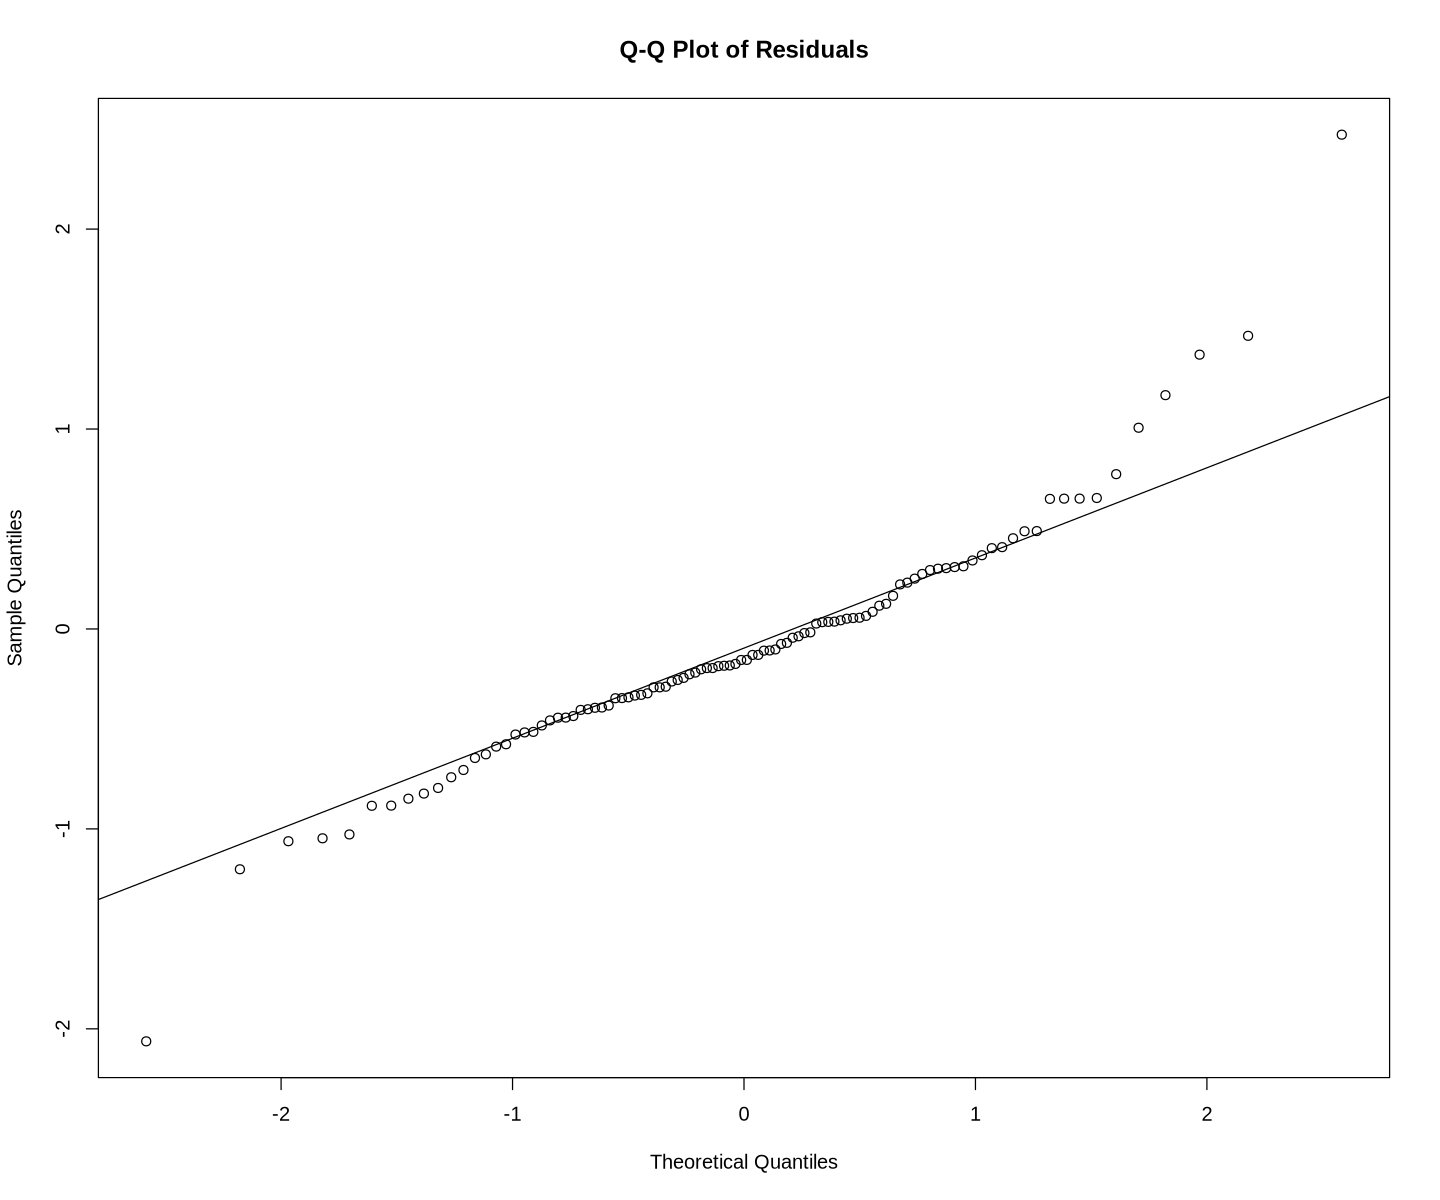

In [33]:
# Create a Q-Q plot of residuals
qqnorm(residuals, main = "Q-Q Plot of Residuals")
qqline(residuals)


In [34]:
# Assuming your model formula is "MEDV ~ .", calculate VIFs for the independent variables
library(car)
vif(model)

ERROR: Error in library(car): there is no package called ‘car’


In [ ]:
#install.packages("car")

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’


Warning message in install.packages("car"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### 1. The residuals (=errors) have zero mean

In [ ]:
mean_residuals <- mean(model$residuals)
cat("Mean of Residuals:", mean_residuals, "\n")

Mean of Residuals: -1.447638e-17 


###  2. The variance of the residuals is constant (and finite) → Homoskedasticity (Breusch-Pagan Test)

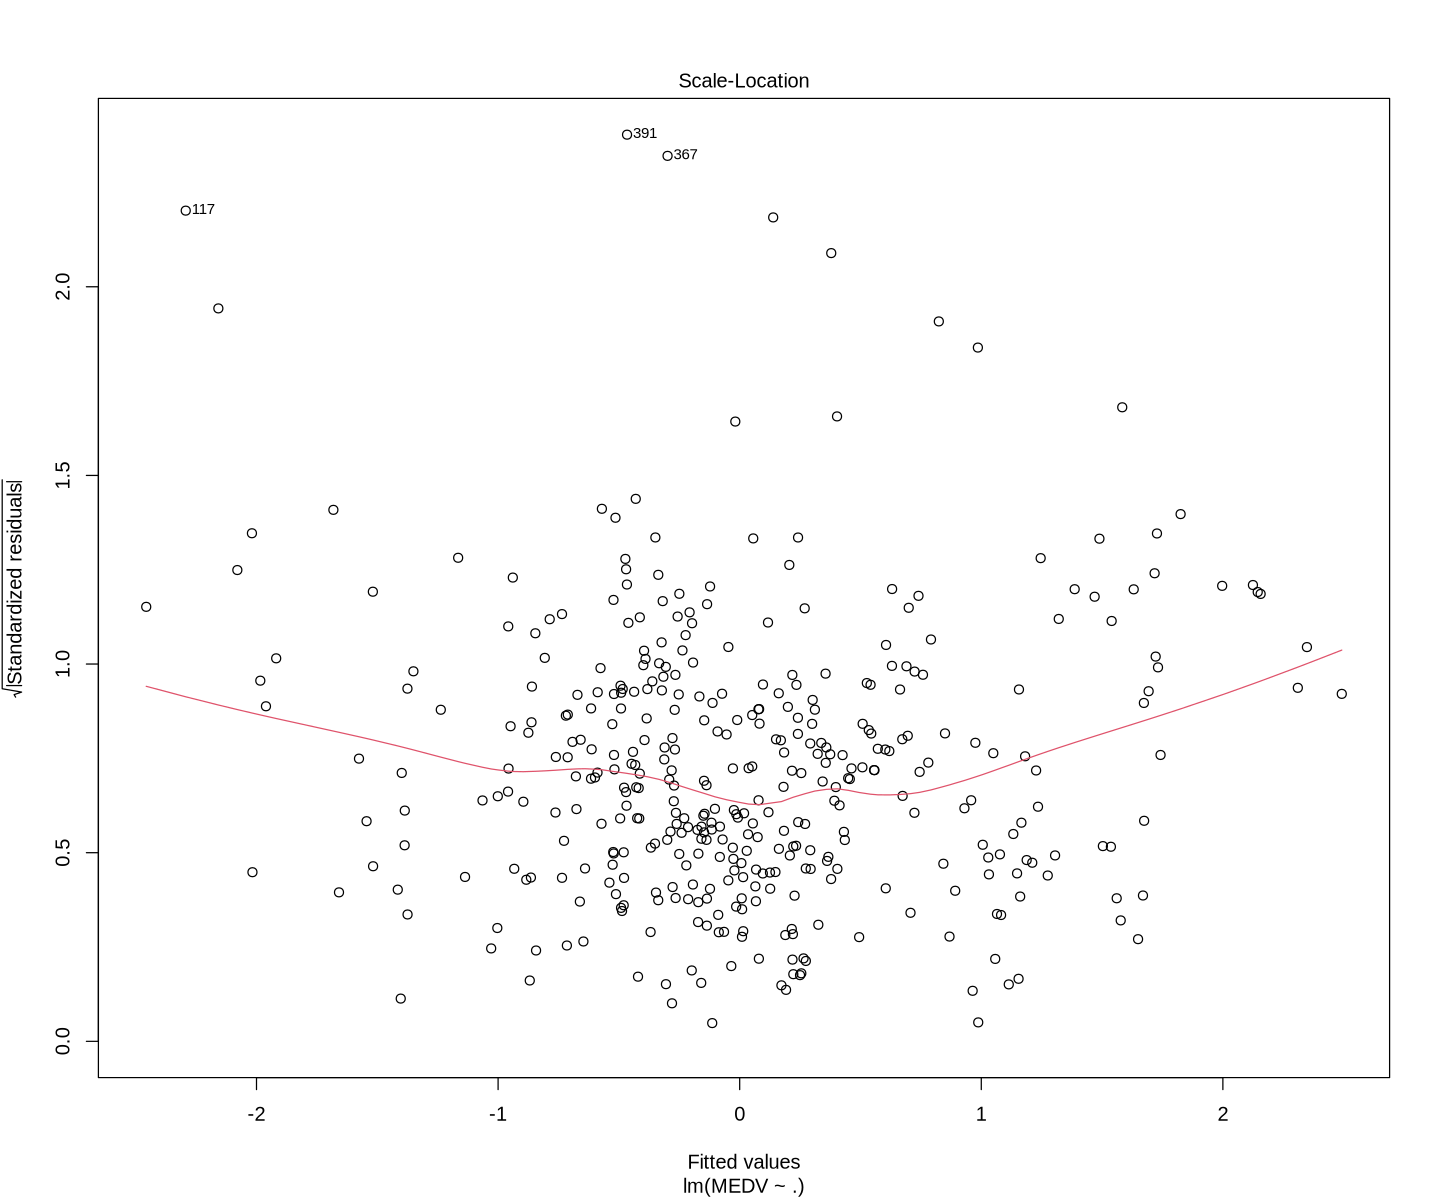

In [ ]:
plot(model, which = 3)  # 3 corresponds to residuals vs. fitted values plot
#install.packages("lmtest")  # Install lmtest packag

In [ ]:
library(lmtest)  # Load lmtest package

# Perform Breusch-Pagan test
bp_test <- bptest(model)
print(bp_test)


	studentized Breusch-Pagan test

data:  model
BP = 42.831, df = 11, p-value = 1.162e-05



### 3. The residuals are linearly independent of one another Autocorrelation (Durbin-Watson Test)

In [ ]:
# Perform the Durbin-Watson test
durbin_watson_test <- dwtest(model)
print(durbin_watson_test)


	Durbin-Watson test

data:  model
DW = 1.9319, p-value = 0.2438
alternative hypothesis: true autocorrelation is greater than 0



#### 4. Linear Correlation (Checking Residuals vs. Explanatory Variables)

In [ ]:
# Calculate residuals
residuals <- residuals(model)

correlations <- sapply(train_data_df[, -1], function(var) cor(residuals, var))
print(correlations)

         PRLZ         INDUS           NOX           AVR           AGE 
 3.601274e-18 -3.013975e-18  5.194944e-17 -6.899229e-17  8.976562e-18 
          DIS           RAD           TAX          TAX2           SUB 
-7.593668e-18  4.740075e-18 -2.243467e-18  7.785760e-18  3.892124e-17 
         MEDV 
 5.894269e-01 


### 5. Normality (Jarque-Bera Test)

In [ ]:
# Install the required packages individually
install.packages("curl")
install.packages("TTR")
install.packages("curl")
install.packages("quantmod")

# Once the required packages are installed, you can install 'tseries'
install.packages("tseries")

# Now, load the 'tseries' package
library(tseries)

# Continue with the Jarque-Bera test as mentioned earlier

Warning message in install.packages("curl"):
“installation of package ‘curl’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘curl’


Warning message in install.packages("TTR"):
“installation of package ‘curl’ had non-zero exit status”
Warning message in install.packages("TTR"):
“installation of package ‘TTR’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("curl"):
“installation of package ‘curl’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘TTR’, ‘curl’


Warning message in install.packages("quantmod"):
“installation of package ‘curl’ had non-zero exit status”
Warning message in install.packages("quantmod"):
“installation of package ‘TTR’ had non-zero exit status”
Warning message in install.packages("quantmod"

ERROR: Error in library(tseries): there is no package called ‘tseries’


In [ ]:
library(tseries)

ERROR: Error in library(tseries): there is no package called ‘tseries’


In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_test <- shapiro.test(residuals)
print(shapiro_test)


	Shapiro-Wilk normality test

data:  residuals
W = 0.86243, p-value < 2.2e-16



In [ ]:
library(moments)

In [ ]:
skew <- skewness(residuals)
kurt <- kurtosis(residuals)

In [ ]:
cat("Skewness:", skew, "\n")
cat("Kurtosis:", kurt, "\n")

Skewness: 1.935266 
Kurtosis: 11.38459 


In [ ]:
JarqueBera.test(residuals(model))

ERROR: Error in JarqueBera.test(residuals(model)): could not find function "JarqueBera.test"


In [ ]:
jarque.bera.test(residuals(model))

ERROR: Error in jarque.bera.test(residuals(model)): could not find function "jarque.bera.test"
